### **1. Download the 80-cereals dataset from https://www.kaggle.com/crawford/80-cereals**

In [9]:
!pip install kaggle

In [10]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [11]:
! kaggle datasets download 'crawford/80-cereals'

  0% 0.00/2.24k [00:00<?, ?B/s]
100% 2.24k/2.24k [00:00<00:00, 3.43MB/s]


In [12]:
!unzip 80-cereals.zip

Archive:  80-cereals.zip
  inflating: cereal.csv              


In [13]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **2. Load the dataset using pd.read_csv method**

In [14]:
cereal=pd.read_csv('cereal.csv')
cereal

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


### **3. a. In the column "mfr", replace the column "K" as "Kellogg's", "G" as "Nestle" and all other values as "Other Brands"**

In [15]:
cereal['mfr'].unique()
dic={'K':"Kelogg's", 'G':'Nestle'}
dic.update(dict.fromkeys(['N', 'P','A','Q','R'], 'Other Brands'))
cereal['mfr']=cereal['mfr'].map(dic)
cereal['mfr'] 

0     Other Brands
1     Other Brands
2         Kelogg's
3         Kelogg's
4     Other Brands
          ...     
72          Nestle
73          Nestle
74    Other Brands
75          Nestle
76          Nestle
Name: mfr, Length: 77, dtype: object

### **3. b. In the column "type", replace "C" with "Type 1" and "H" with "Type 2"**

In [16]:
cereal["type"].replace({"C": "Type 1", "H": "Type 2"}, inplace=True)
cereal["type"]

0     Type 1
1     Type 1
2     Type 1
3     Type 1
4     Type 1
       ...  
72    Type 1
73    Type 1
74    Type 1
75    Type 1
76    Type 1
Name: type, Length: 77, dtype: object

### **4. Visualise the count of above two features "mfr" and "type" with a bar-plot**

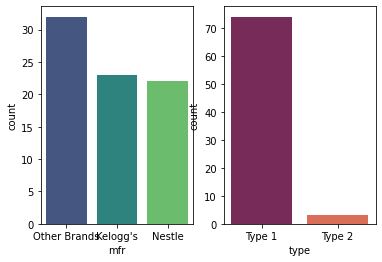

In [17]:
f, ax = plt.subplots(1,2)
sns.countplot(x='mfr',data=cereal, orient='v', ax=ax[0], palette='viridis')
sns.countplot(x='type',data=cereal, orient='v', ax=ax[1], palette='rocket')

### **5. Describe the five-number summary and boxplots of the features - protien, sugars, fat, carbo**

In [18]:
# Display Summary of the columns
cereal.describe()[['protein', 'sugars', 'fat', 'carbo']]

,protein,sugars,fat,carbo
count,77.000000,77.000000,77.000000,77.000000
mean,2.545455,6.922078,1.012987,14.597403
std,1.094790,4.444885,1.006473,4.278956
min,1.000000,-1.000000,0.000000,-1.000000
25%,2.000000,3.000000,0.000000,12.000000
50%,3.000000,7.000000,1.000000,14.000000
75%,3.000000,11.000000,2.000000,17.000000
max,6.000000,15.000000,5.000000,23.000000


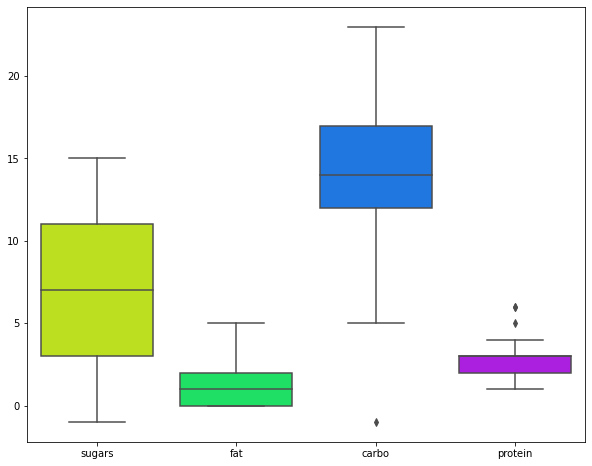

In [19]:
# Boxplot the columns and check their means
df = pd.DataFrame(data = cereal, columns = ['sugars', 'fat', 'carbo','protein'])
plt.figure(figsize=(10,8))
sns.boxplot(data=df, palette='hsv')
plt.show()

### **6. Plot Histograms for the features - fat, carbo, sodium, fiber**

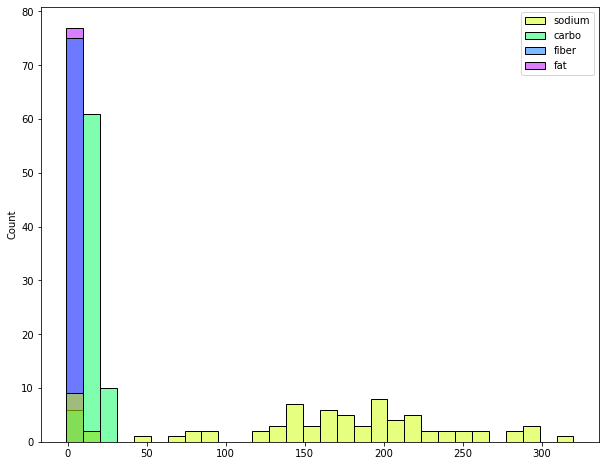

In [20]:
dff = pd.DataFrame(data = cereal, columns = ['sodium', 'carbo','fiber','fat'])
plt.figure(figsize=(10,8))
sns.histplot(data=dff, palette='hsv',bins=30)
plt.show()

### **7. Split the datasets into following ratios: 60:40, 70:30, 80:20. Write down what happens when you give "random_state" parameter with a constant value and what happens if you do not mention the parameter at all.**

* Another important consideration is that rows are assigned to the train and test sets randomly.

* This is done to ensure that datasets are a representative sample (e.g. random sample) of the original dataset, which in turn, should be a representative sample of observations from the problem domain.

* This can be achieved by setting the “random_state” to an integer value. Any value will do; it is not a tunable hyperparameter.

In [21]:
for i in [.4, .3, .2]:
  X_train, X_test, y_train, y_test = train_test_split(cereal.iloc[:,3:-1],cereal.iloc[:,-1],test_size=i)
  print(f'\n\nTrain: [{len(X_train)/len(cereal)}] , Test: [{len(X_test)/len(cereal)}]\n')
  print('First 5 rows of data without Random State-->\n',X_train[:5].to_markdown(index=True),'\n-------------------------------------------------------------------------------------------------------------------------------------')



Train: [0.5974025974025974] , Test: [0.4025974025974026]

First 5 rows of data without Random State-->
 |    |   calories |   protein |   fat |   sodium |   fiber |   carbo |   sugars |   potass |   vitamins |   shelf |   weight |   cups |
|---:|-----------:|----------:|------:|---------:|--------:|--------:|---------:|---------:|-----------:|--------:|---------:|-------:|
| 74 |        100 |         3 |     1 |      230 |     3   |    17   |        3 |      115 |         25 |       1 |        1 |   0.67 |
| 11 |        110 |         6 |     2 |      290 |     2   |    17   |        1 |      105 |         25 |       1 |        1 |   1.25 |
|  5 |        110 |         2 |     2 |      180 |     1.5 |    10.5 |       10 |       70 |         25 |       1 |        1 |   0.75 |
| 10 |        120 |         1 |     2 |      220 |     0   |    12   |       12 |       35 |         25 |       2 |        1 |   0.75 |
| 30 |        100 |         2 |     0 |       45 |     0   |    11   |       1

### **Write down what happens when you give "random_state" parameter with a constant value and what happens if you do not mention the parameter at all.**

In [45]:
for i in [.4, .3, .2]:
  X_train, X_test, y_train, y_test = train_test_split(cereal.iloc[:,3:-1],cereal.iloc[:,-1],test_size=i,random_state=1)
  print(f'\n\nTrain: [{len(X_train)/len(cereal)}] , Test: [{len(X_test)/len(cereal)}]\n')
  print('First 5 rows of data with Random State-->\n',X_train[:5].to_markdown(index=True),'\n-------------------------------------------------------------------------------------------------------------------------------------')



Train: [0.5974025974025974] , Test: [0.4025974025974026]

First 5 rows of data with Random State-->
 |    |   calories |   protein |   fat |   sodium |   fiber |   carbo |   sugars |   potass |   vitamins |   shelf |   weight |   cups |
|---:|-----------:|----------:|------:|---------:|--------:|--------:|---------:|---------:|-----------:|--------:|---------:|-------:|
| 21 |        110 |         2 |     0 |      220 |       1 |      21 |        3 |       30 |         25 |       3 |        1 |    1   |
| 68 |         90 |         2 |     0 |       15 |       3 |      15 |        5 |       90 |         25 |       2 |        1 |    1   |
|  3 |         50 |         4 |     0 |      140 |      14 |       8 |        0 |      330 |         25 |       3 |        1 |    0.5 |
| 44 |        150 |         4 |     3 |       95 |       3 |      16 |       11 |      170 |         25 |       3 |        1 |    1   |
| 56 |        100 |         4 |     1 |      135 |       2 |      14 |        6 |

### **8. Apply MinMaxScaler() and StandardScaler() to the following features: calories, protien, fat, sodium, fiber, carbo, sugars.**

In [71]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler
X=cereal.iloc[:,3:-6]
y=cereal.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
print(f'MinMax Normalized Training Set -\n {X_train_norm[:3]}\n\nMinMax Normalized Testing Set -\n {X_test_norm[:3]}')

MinMax Normalized Training Set -
 [[0.6        0.2        0.         1.         0.         1.
  0.2       ]
 [0.7        0.         0.4        0.75862069 0.07142857 0.41176471
  0.73333333]
 [0.6        0.2        0.2        0.5862069  0.07142857 0.70588235
  0.4       ]]

MinMax Normalized Testing Set -
 [[0.6        0.         0.2        0.96551724 0.         0.58823529
  0.6       ]
 [0.5        0.6        0.2        0.         0.         0.64705882
  0.2       ]
 [0.5        0.4        0.         0.         0.21428571 0.52941176
  0.46666667]]


In [74]:
# StandardScaler for Standardization
'''StandardScaler is a class from sklearn.preprocessing which is used for standardization.'''
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
print(f'Standardization on Training Set -\n {X_train_std[:3]}\n\nStandardization on Testing Set -\n {X_test_std[:3]}')

Standardization on Training Set -
 [[ 0.26818252 -0.36955223 -0.88412115  1.71608339 -0.79353612  1.82033378
  -0.90248548]
 [ 0.79461487 -1.25983714  1.10985421  0.824393   -0.39107282 -0.68883892
   0.87729984]
 [ 0.26818252 -0.36955223  0.11286653  0.18747129 -0.39107282  0.56574743
  -0.23506598]]

Standardization on Testing Set -
 [[ 0.26818252 -1.25983714  0.11286653  1.58869905 -0.79353612  0.06391289
   0.43235351]
 [-0.25824983  1.4110176   0.11286653 -1.97806251 -0.79353612  0.31483016
  -0.90248548]
 [-0.25824983  0.52073268 -0.88412115 -1.97806251  0.41385377 -0.18700438
  -0.01259282]]


### **9. Does the standard or min-max scaling make a difference in value distribution? Support your answers with some visualisations on the above dataset.**

### **Some conclusions**:

1. Feature scaling is about transforming the value of features in the similar range like others for machine learning algorithms to behave better resulting in optimal models.
2. Feature scaling is not required for algorithms such as random forest or decision tree
3. *Standardization and normalization* are two most common techniques for feature scaling.
4. *Normalization* is about transforming the feature values to fall within the **bounded intervals** (min and max)
5. *Standardization* is about transforming the feature values to **fall around mean as 0 with standard deviation as 1**
6. *Standardization* maintains useful information about **outliers** and makes the algorithm less sensitive to them in contrast to min-max scaling
7. *MinMaxScaler* class of sklearn.preprocessing is used for **normalization** of features.
8. *StandardScaler* class of sklearn.preprocessing is used for **standardization** of features.

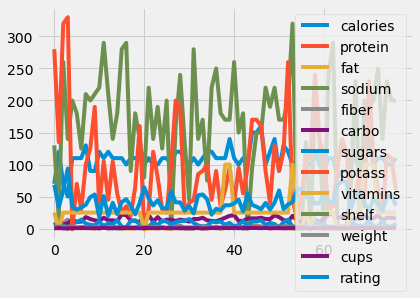

In [73]:
cereal.plot()

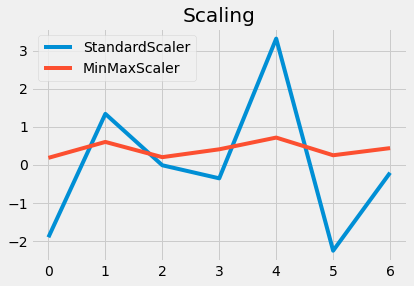

In [107]:
plt.plot(StandardScaler().fit_transform(cereal[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars']])[0], label='StandardScaler')
plt.plot(MinMaxScaler().fit_transform(cereal[['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars']])[0], label='MinMaxScaler')
plt.title('Scaling')
plt.legend()

### **10. As an extension of 7th step, Generate a new Pandas DataFrame with the following columns based on the Training Dataset: Split Ratio | Random State | Total Number of Entries | Count of Kellogg's | Count of Nestle | Count of Other Brands**



In [99]:
import random
empty = list()
for i in [.4, .3, .2]: 
    X_train, X_test, y_train, y_test = train_test_split(cereal.iloc[:,1:-1],cereal.iloc[:,-1],test_size=i, random_state=random.randint(0,100))
    empty.append([i, random.randint(0,100), X_train.shape[0], X_train['mfr'].value_counts()[1], X_train['mfr'].value_counts()[2], X_train['mfr'].value_counts()[0]])
finaldata=pd.DataFrame(empty, columns=['SplitRatio','RandomState','TotalNumberofEntries','CountofKellogg','CountofNestle','CountofOtherBrands'])
finaldata

,SplitRatio,RandomState,TotalNumberofEntries,CountofKellogg,CountofNestle,CountofOtherBrands
0,0.4,81,46,17,10,19
1,0.3,48,53,17,13,23
2,0.2,72,61,18,17,26


<Figure size 720x576 with 0 Axes>

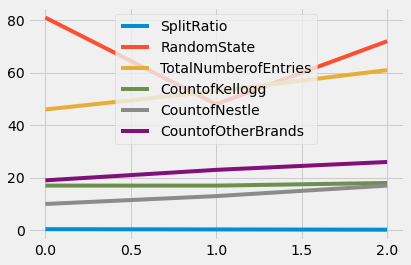

In [105]:
finaldata.plot()